# Student Performance

## About Dataset
"This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success."

## Problem Statement
The goal to this project is to predict the Exam score from the student.

## Dataset Overview

- Number of samples: 6607
- Number of features: 20
- Target variable: Exam_Score (Min score 55 - Max score 101)

## Project Framework: Understanding and Modeling Student Performance

This project aims to build a model to predict student exam performance based on various factors. We will follow these key steps:

1.  **Data Exploration and Visualization:** Understand the dataset's structure, identify feature types, and visualize distributions and relationships.
2.  **Feature Engineering:** Create new features or transform existing ones to improve model performance.
3.  **Data Preprocessing:** Handle categorical features through encoding and scale numerical features.
4.  **Model Selection and Training:** Explore different regression models and train them on the prepared data.
5.  **Model Evaluation and Fine-tuning:** Assess model performance using techniques like cross-validation and optimize hyperparameters.
6.  **Final Evaluation:** Evaluate the best model on an unseen test set.

## EDA

The goal is to get insights from the data, getting better understand from what we have to work. We need to see the numerical and categorical features, their distributions, estimates of location and variance, look for correlation, etc.

In [1]:
import kagglehub
import os

dataset_slug = "lainguyn123/student-performance-factors"
dataset_file = "StudentPerformanceFactors.csv"

print(f"Downloading dataset file '{dataset_file}' from '{dataset_slug}'...")
file_path = kagglehub.dataset_download(dataset_slug, dataset_file)
print("Download complete.")

print("Path to dataset file:", file_path)

Using Colab cache for faster access to the 'student-performance-factors' dataset.
Download complete.
Path to dataset file: /kaggle/input/student-performance-factors/StudentPerformanceFactors.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
pd.set_option('future.no_silent_downcasting', True)

In [4]:
df = pd.read_csv(file_path)

# Get insights from the data
display(df.describe(include='all'))
print(df.columns)
print(f'Total columns: {len(df.columns)}')
print(f'Shape: {df.shape}')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
Total columns: 20
Shape: (6607, 20)


In [ ]:
display(df.loc[df['Exam_Score'] <  60])

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
283,13,69,Medium,Low,Yes,5,68,Low,Yes,0,High,Medium,Public,Positive,1,Yes,High School,Moderate,Female,59
504,16,60,Low,Medium,Yes,8,66,Low,Yes,1,High,High,Private,Neutral,2,Yes,High School,Moderate,Female,59
524,15,63,Medium,Low,No,8,55,Low,Yes,0,Medium,Low,Public,Neutral,3,No,College,Near,Female,59
646,4,64,Medium,High,Yes,7,65,Medium,Yes,1,Medium,High,Public,Negative,4,No,High School,Far,Male,59
668,4,69,Medium,Low,No,9,93,Low,No,2,Medium,High,Private,Negative,3,No,High School,Moderate,Female,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,19,61,High,Medium,Yes,6,52,Low,No,1,Low,Medium,Public,Neutral,3,No,High School,Far,Female,59
6102,13,69,Medium,Low,Yes,7,53,High,No,2,Medium,Medium,Private,Negative,3,Yes,High School,Near,Female,59
6125,15,67,Low,Medium,Yes,5,59,Low,Yes,0,Low,Medium,Private,Neutral,3,No,High School,Near,Male,59
6431,4,60,Medium,Medium,Yes,7,55,Medium,Yes,2,Low,Medium,Private,Neutral,2,No,Postgraduate,Near,Male,58


In [ ]:
# Get the non-numerical features
df.select_dtypes(include=['object']).head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


In [ ]:
# Get the numerical features
df.select_dtypes(include=np.number).head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


### Data Quality Checks

#### Cardinality

This step shows us how many unique values has each categorical feature, this is imporant to know because we have to encode these categorical values, already know the amount of unique values, we can see if we can apply binary, nominal or ordinal encoder.

In [ ]:
# Get the cardinality from each categorical feature

df.select_dtypes(include='object').apply(lambda x: x.nunique())

,0
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Motivation_Level,3
Internet_Access,2
Family_Income,3
Teacher_Quality,3
School_Type,2
Peer_Influence,3
Learning_Disabilities,2


In [ ]:
import numpy as np
import pandas as pd

expected_levels = ['Low', 'Medium', 'High']

nominal_cols = []
ordinal_cols = []
binary_cols = []

for col in df.select_dtypes(include='object'):
  unique_values = df[col].unique()
  # Filter out NaN values before checking for ordinality
  unique_values_filtered = [val for val in unique_values if pd.notna(val)]
  nunique_values = len(unique_values_filtered)

  if nunique_values == 2:
    print(f'{col}: Are binary')
    binary_cols.append(col)
  elif set(unique_values_filtered).issubset(set(expected_levels)):
    print(f'{col}: Are ordinal')
    ordinal_cols.append(col)
  else:
    print(f'{col}: Are nominal')
    nominal_cols.append(col)

print(f'Nominal: {nominal_cols}')
print(f'Ordinal: {ordinal_cols}')
print(f'Binary: {binary_cols}')

Parental_Involvement: Are ordinal
Access_to_Resources: Are ordinal
Extracurricular_Activities: Are binary
Motivation_Level: Are ordinal
Internet_Access: Are binary
Family_Income: Are ordinal
Teacher_Quality: Are ordinal
School_Type: Are binary
Peer_Influence: Are nominal
Learning_Disabilities: Are binary
Parental_Education_Level: Are nominal
Distance_from_Home: Are nominal
Gender: Are binary
Nominal: ['Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
Ordinal: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']
Binary: ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']


### Estimates of location

In [ ]:
# Get the estimates of location and variability from the numerical data
estimates_loc = []
for col in df.select_dtypes(include=np.number):
  estimates_loc.append({
      'mean': df[col].mean(),
      'median': df[col].median(),
      'std': df[col].std(),
      'IQR': stats.iqr(df[col]),
      'min': df[col].min(),
      'max': df[col].max()
  })

pd.DataFrame(estimates_loc, index=df.select_dtypes(include=np.number).columns)

,mean,median,std,IQR,min,max
Hours_Studied,19.975329,20.0,5.990594,8.0,1,44
Attendance,79.977448,80.0,11.547475,20.0,60,100
Sleep_Hours,7.029060,7.0,1.468120,2.0,4,10
Previous_Scores,75.070531,75.0,14.399784,25.0,50,100
Tutoring_Sessions,1.493719,1.0,1.230570,1.0,0,8
Physical_Activity,2.967610,3.0,1.031231,2.0,0,6
Exam_Score,67.235659,67.0,3.890456,4.0,55,101


In [ ]:
#Get the mode from each categorical feature
estimates_loc_cat = []
for col in df.select_dtypes(exclude=np.number):
  estimates_loc_cat.append({
      'mode': df[col].mode()[0],
  })

pd.DataFrame(estimates_loc_cat, index=df.select_dtypes(exclude=np.number).columns)

,mode
Parental_Involvement,Medium
Access_to_Resources,Medium
Extracurricular_Activities,Yes
Motivation_Level,Medium
Internet_Access,Yes
Family_Income,Low
Teacher_Quality,Medium
School_Type,Public
Peer_Influence,Positive
Learning_Disabilities,No


### Distributions plots

#### Numerical Features Distributions

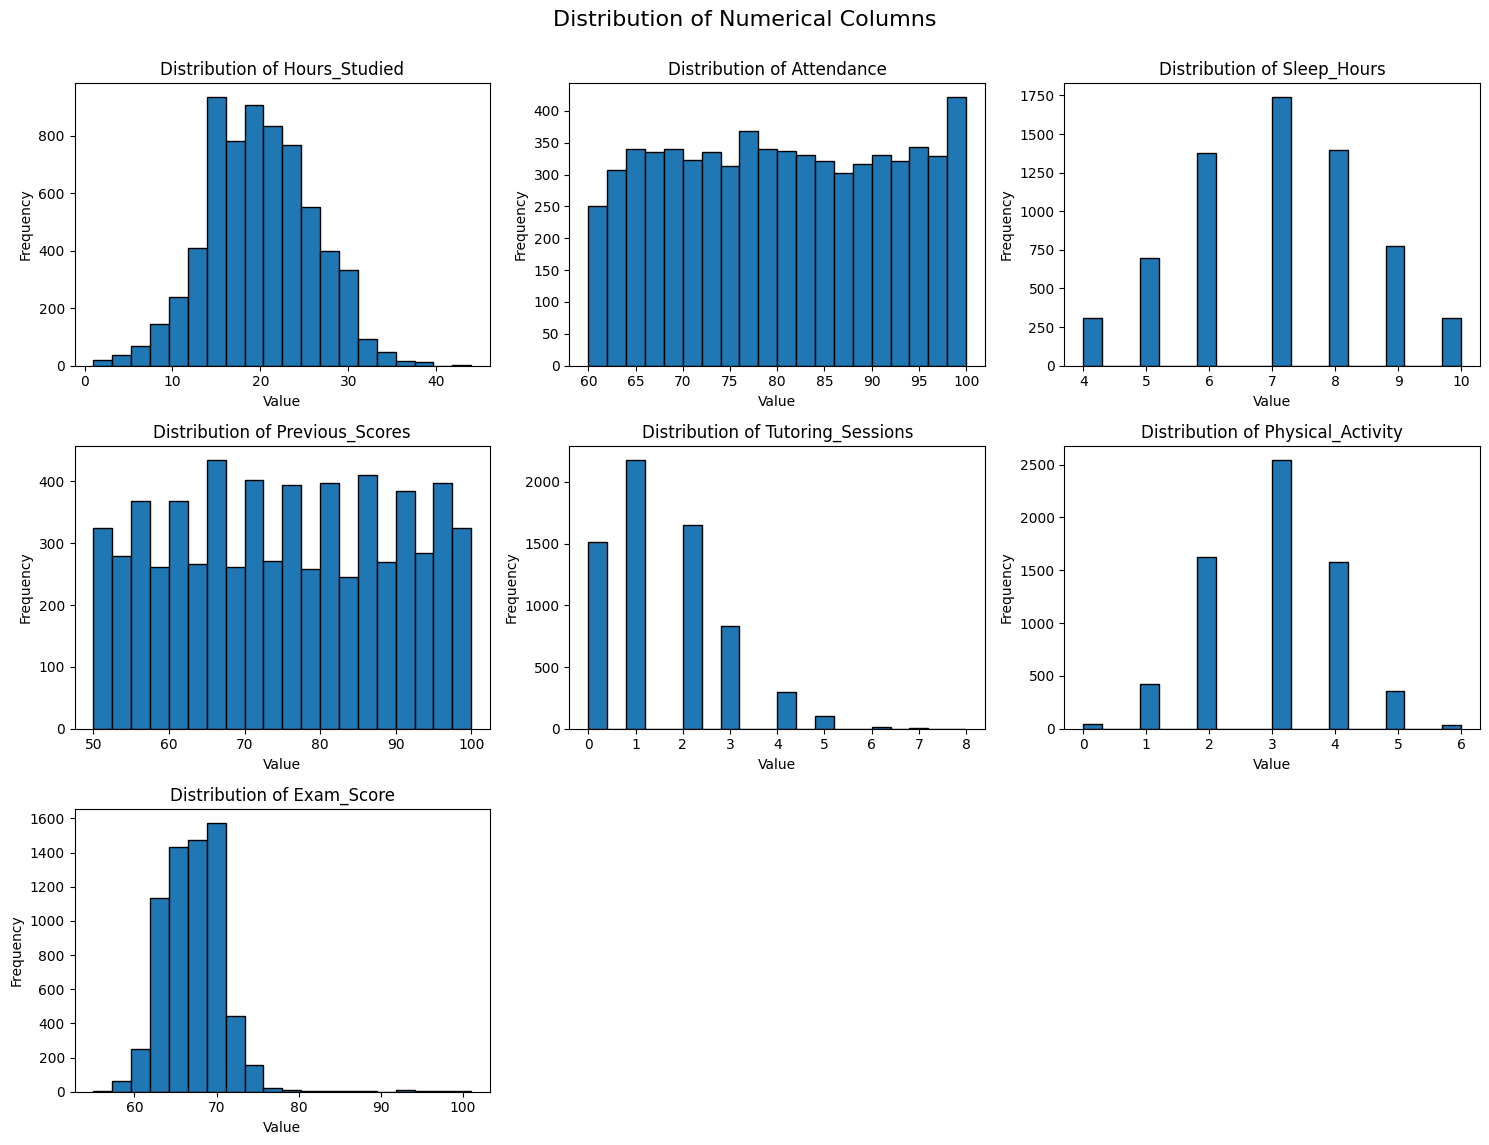

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
n_plots = len(num_cols)

n_rows = (n_plots + 2) // 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.show()

/tmp/ipython-input-2904074558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
/tmp/ipython-input-2904074558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
/tmp/ipython-input-2904074558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
/tmp/ipython-input-2904074558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

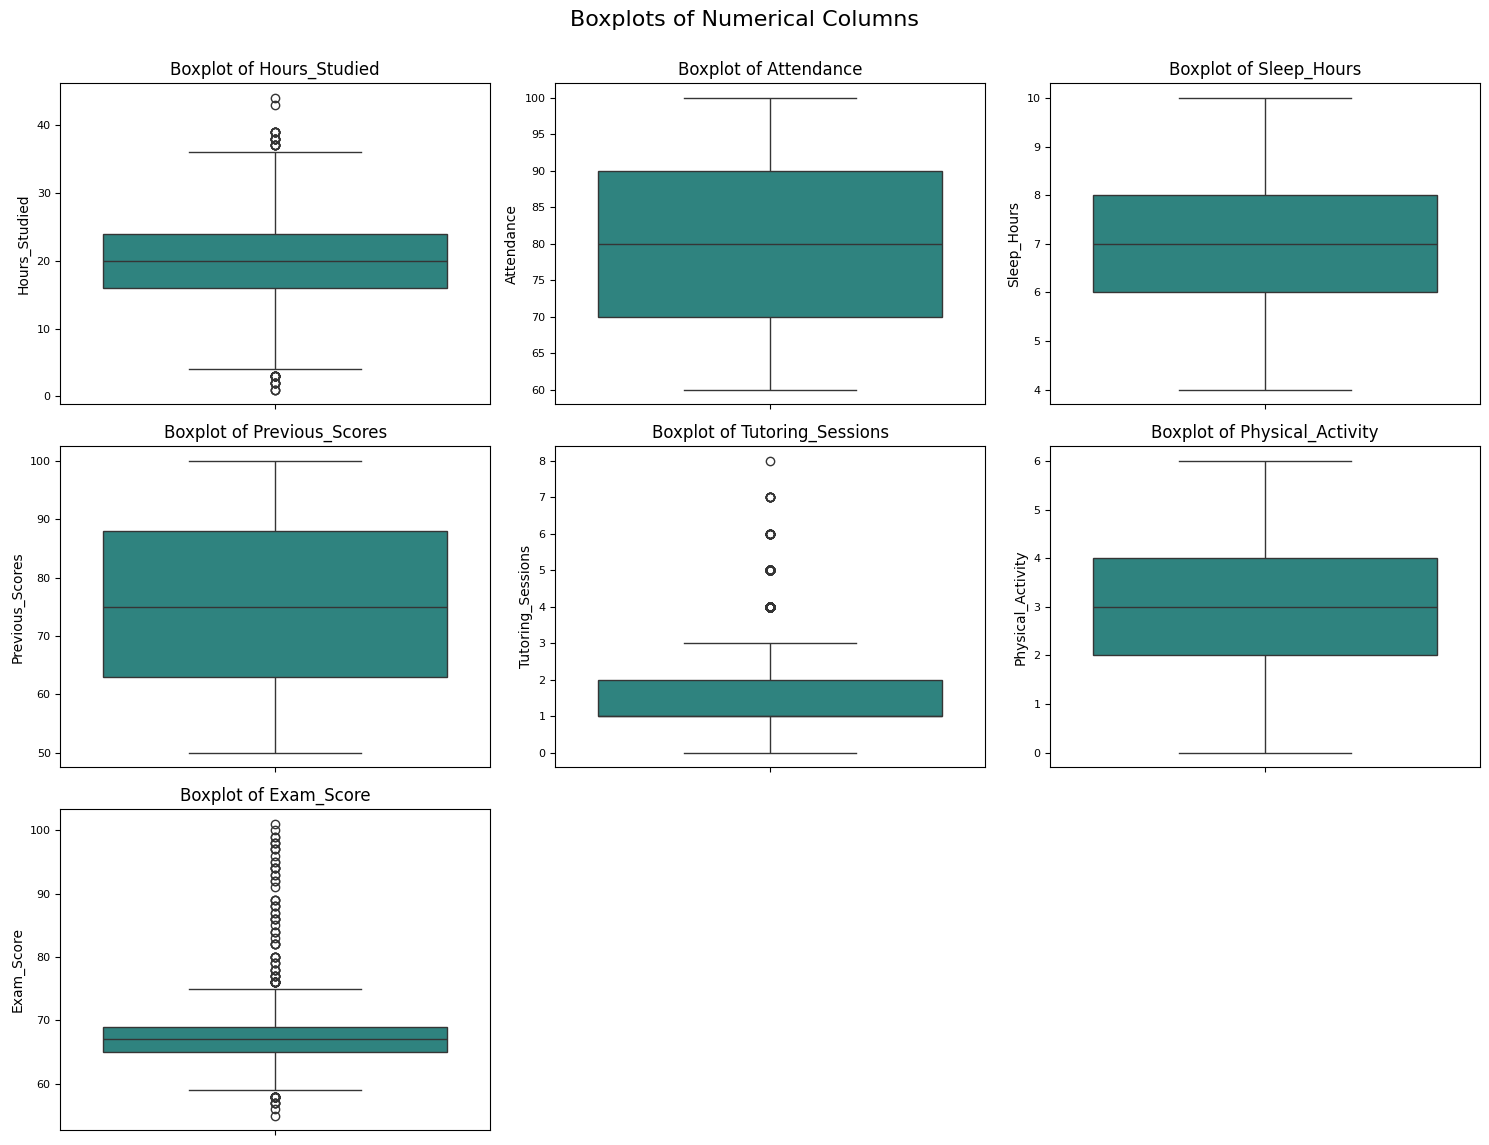

In [ ]:
# See the outliers from the numerical data
num_cols = df.select_dtypes(include=np.number).columns
n_plots = len(num_cols)

n_rows = (n_plots + 2) // 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Boxplots of Numerical Columns', fontsize=16)
plt.show()

#### Categorical Features Distribution

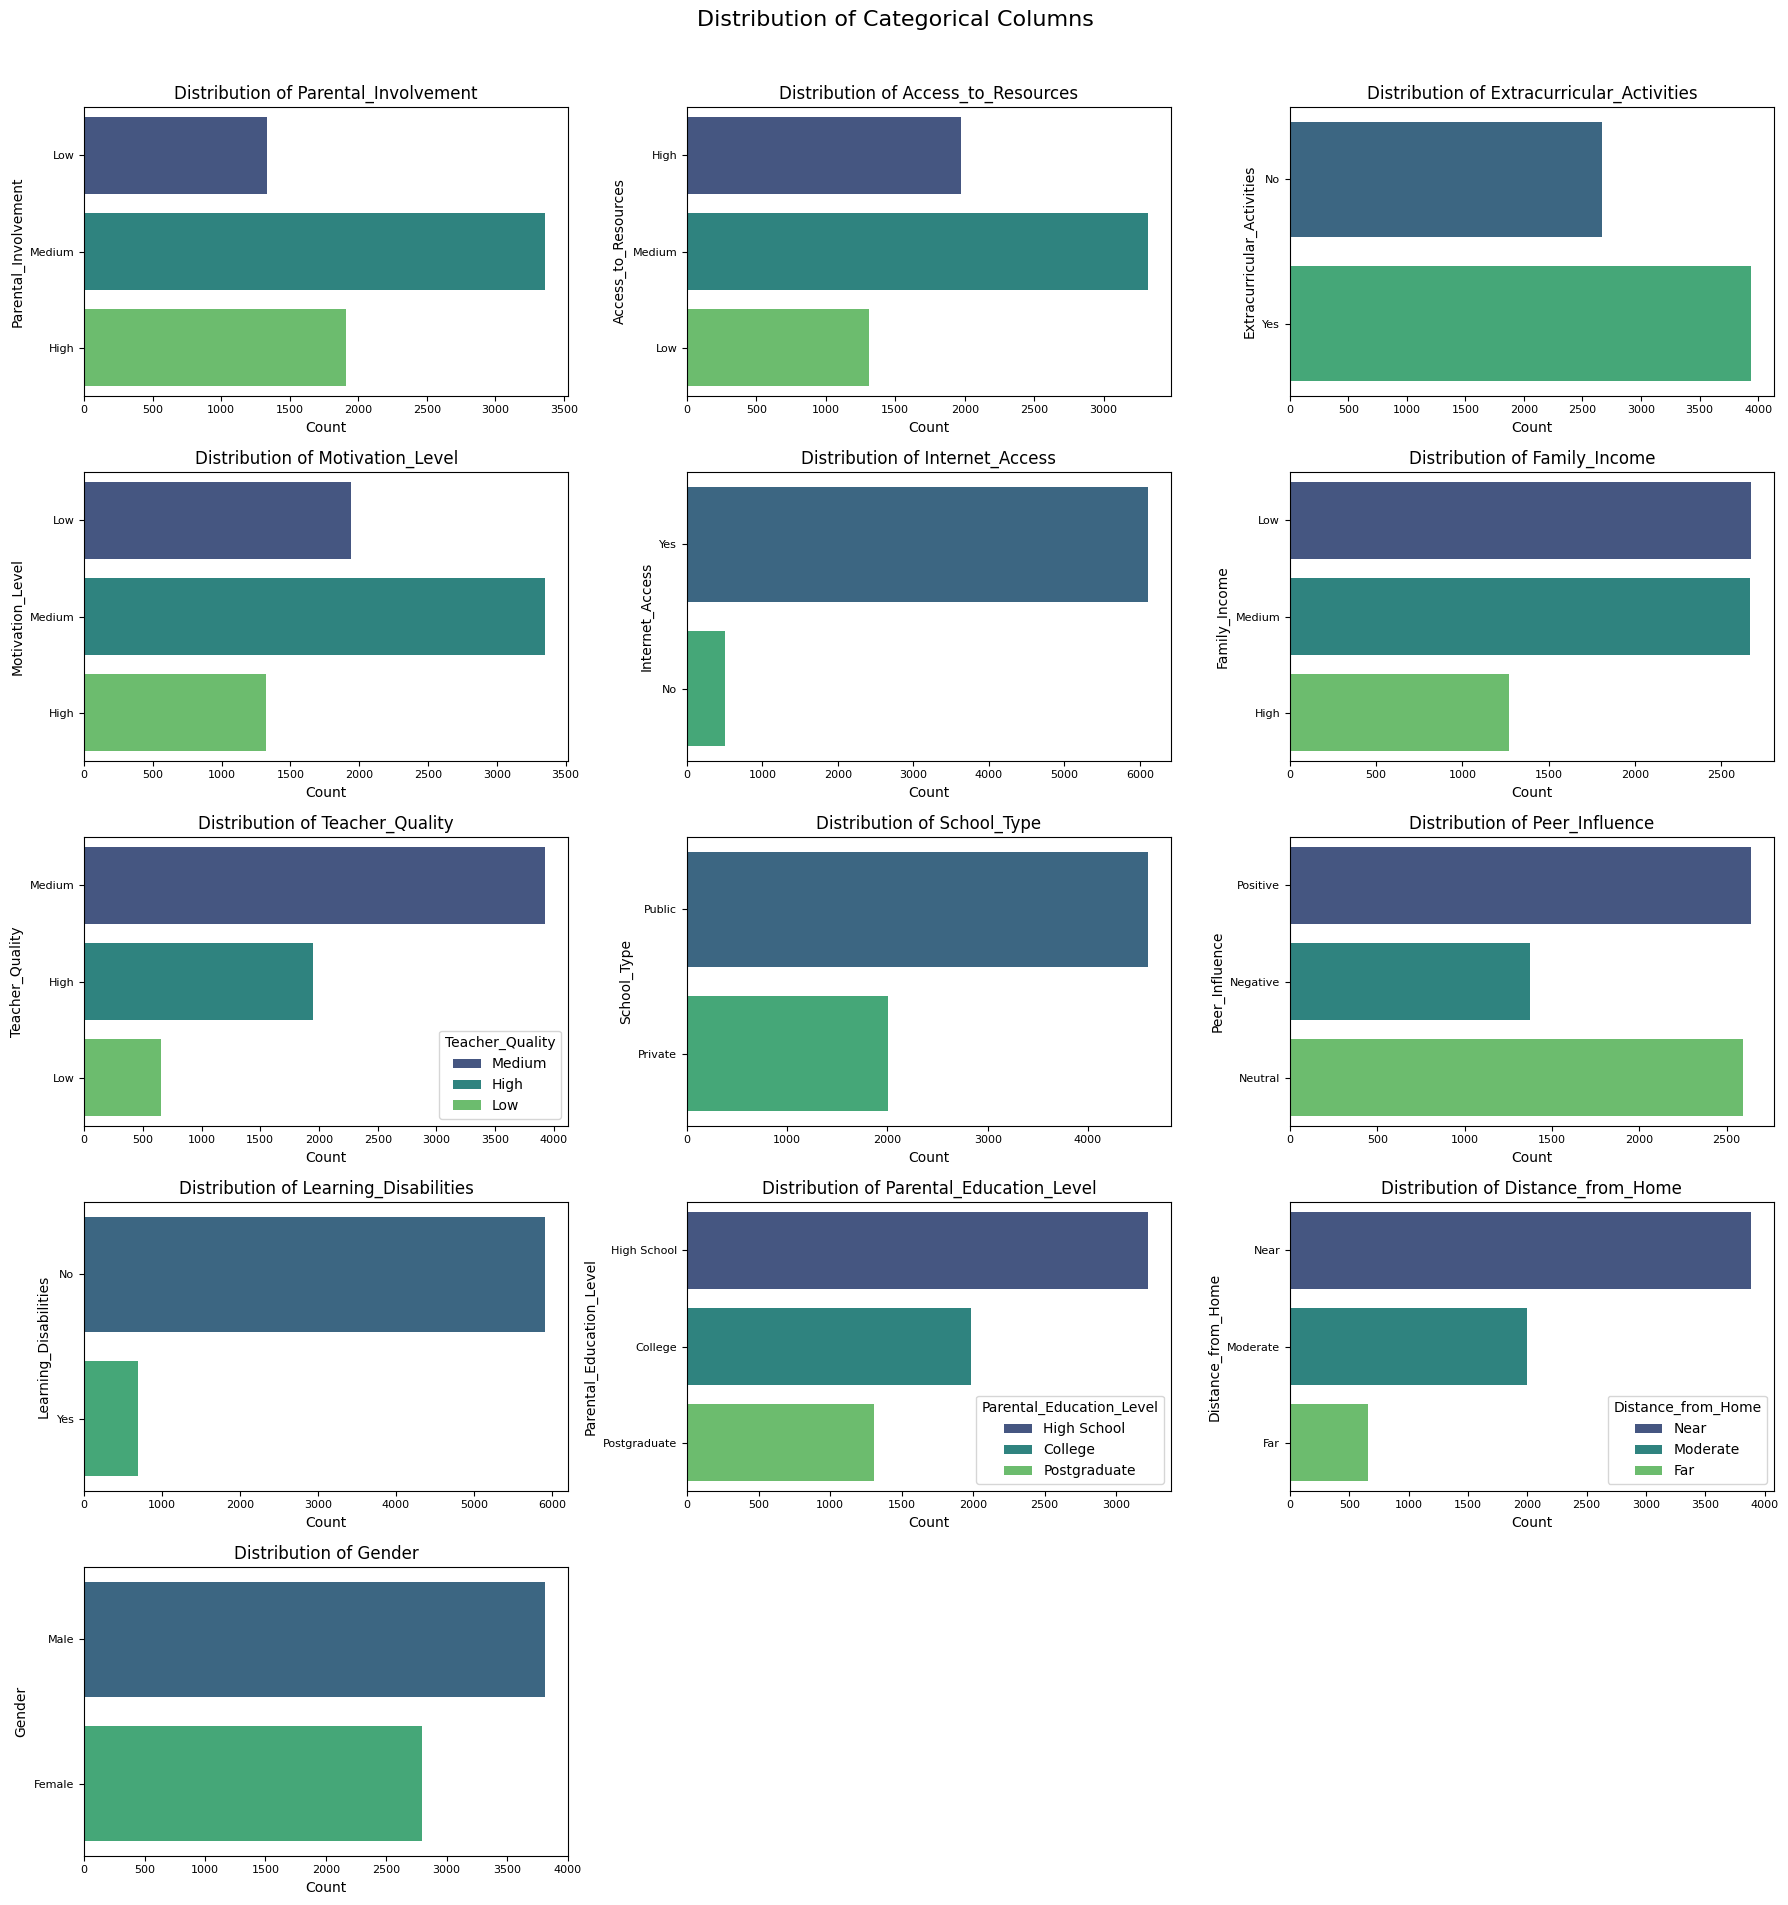

In [ ]:
cat_cols = df.select_dtypes(exclude=np.number).columns
n_plots = len(cat_cols)

n_rows = (n_plots + 2) // n_cols
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', hue=col)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('Count', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Distribution of Categorical Columns', fontsize=16)
plt.show()

### Correlation

The goal is to see what correlation has each feature with the label and each feature among the other features

#### Pearson's method

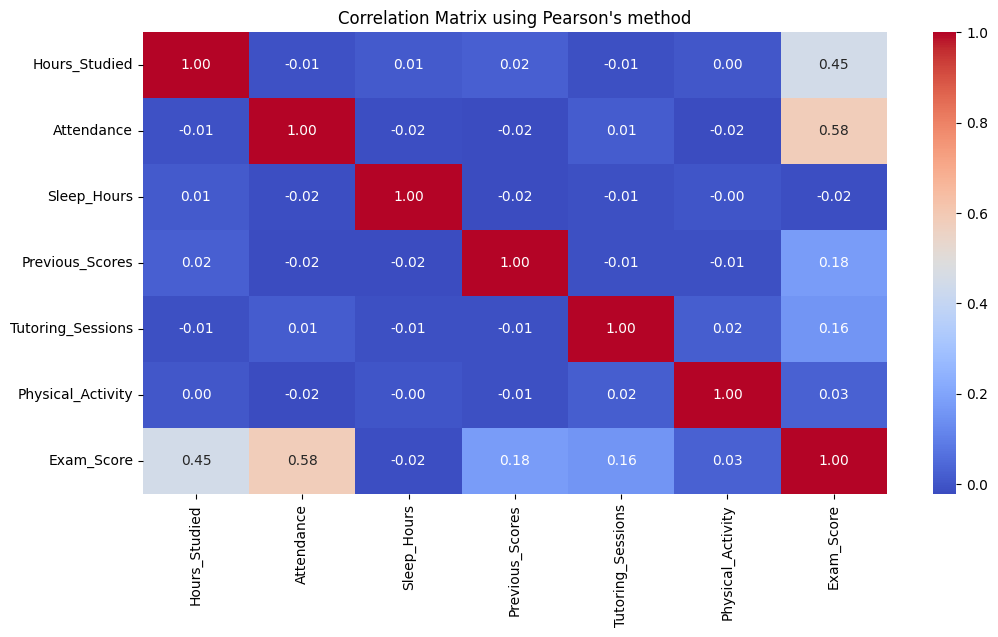

In [ ]:
# Get the correlation matrix from each feature to the label
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix using Pearson's method")
plt.show()

#### Spearman's method

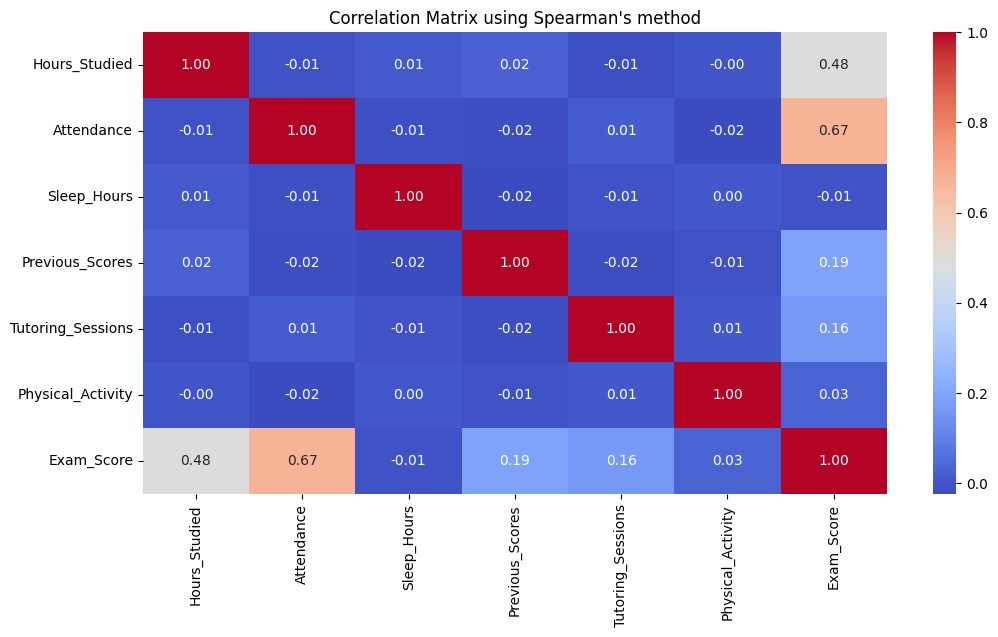

In [ ]:
# Get the correlation matrix from each feature to the label
corr_matrix = df.select_dtypes(include=np.number).corr(method='spearman')

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix using Spearman's method")
plt.show()

#### Cramer's method

In [ ]:
# Exam_Score featured binned in 5 segments
df['Exam_Score_binned'] = pd.cut(df['Exam_Score'], bins=5, labels=False, include_lowest=True)
print("Created 'Exam_Score_binned' column.")
display(df[['Exam_Score', 'Exam_Score_binned']].head())

Created 'Exam_Score_binned' column.


,Exam_Score,Exam_Score_binned
0,67,1
1,61,0
2,74,2
3,71,1
4,70,1


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramer's V statistic for two categorical variables. """
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape)

    # Handle cases where min_dim - 1 might be zero to avoid division by zero
    if min_dim - 1 == 0:
        return 0.0

    # Calculate Cramer's V
    v = np.sqrt(chi2 / (n * (min_dim - 1)))
    return v

print("Defined cramers_v function.")

Defined cramers_v function.


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.append('Exam_Score_binned')

cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = v
            cramers_v_matrix.loc[col2, col1] = v

print("Cramer's V correlation matrix computed.")
display(cramers_v_matrix)


Cramer's V correlation matrix computed.


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score_binned
Parental_Involvement,1.0,0.027429,0.025371,0.018186,0.015715,0.017221,0.014556,0.021746,0.02001,0.010841,0.016108,0.011217,0.024995,0.104185
Access_to_Resources,0.027429,1.0,0.018254,0.016873,0.015138,0.020058,0.017842,0.030929,0.011494,0.006413,0.015792,0.018521,0.007454,0.103541
Extracurricular_Activities,0.025371,0.018254,1.0,0.016214,0.004761,0.015971,0.021249,0.00532,0.033519,0.007786,0.01458,0.025586,0.007633,0.069323
Motivation_Level,0.018186,0.016873,0.016214,1.0,0.020341,0.016396,0.031447,0.013812,0.018748,0.019336,0.015904,0.015227,0.015159,0.072634
Internet_Access,0.015715,0.015138,0.004761,0.020341,1.0,0.018028,0.001971,0.012163,0.01069,0.005583,0.025151,0.010679,0.014559,0.048729
Family_Income,0.017221,0.020058,0.015971,0.016396,0.018028,1.0,0.019704,0.014891,0.014239,0.016431,0.009198,0.01887,0.002046,0.055061
Teacher_Quality,0.014556,0.017842,0.021249,0.031447,0.001971,0.019704,1.0,0.007791,0.016335,0.003926,0.012429,0.010668,0.006007,0.048404
School_Type,0.021746,0.030929,0.00532,0.013812,0.012163,0.014891,0.007791,1.0,0.013386,0.0,0.025269,0.005252,0.003844,0.018592
Peer_Influence,0.02001,0.011494,0.033519,0.018748,0.01069,0.014239,0.016335,0.013386,1.0,0.013989,0.023912,0.0164,0.018966,0.059241
Learning_Disabilities,0.010841,0.006413,0.007786,0.019336,0.005583,0.016431,0.003926,0.0,0.013989,1.0,0.017328,0.008109,0.014681,0.110582


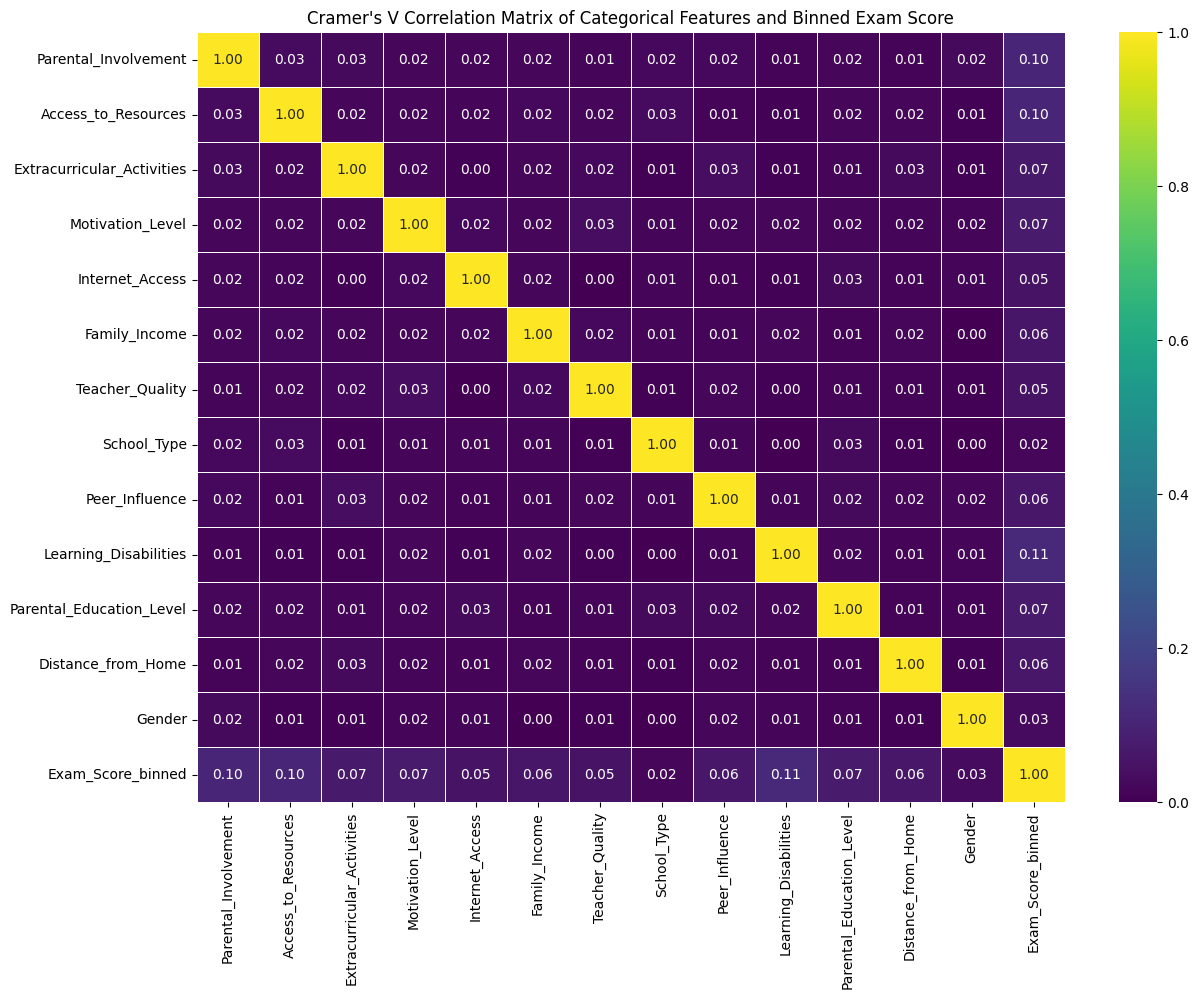

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Cramer's V Correlation Matrix of Categorical Features and Binned Exam Score")
plt.show()

### EDA Summary

At a high level, the dataset contains a larger proportion of categorical
features compared to numerical ones. For this reason, the cardinality analysis
was performed early in the EDA process.

#### Data Quality Checks

Some categorical features contain missing values, including
Distance_from_Home, Parental_Education_Level, and Teacher_Quality.
These missing values may be handled using imputation techniques such as
SimpleImputer with the `most_frequent` strategy.
The proportion of missing values is relatively small and is not expected to
significantly impact model performance.

#### Cardinality
Most categorical features exhibit low cardinality, with a maximum of three
unique values per feature. The majority of these variables appear to be ordinal,
while a smaller subset is nominal or binary. This low cardinality suggests that
standard encoding techniques such as One-Hot Encoding and, where appropriate,
Ordinal Encoding can be applied without significantly increasing the feature space.

#### Estimates of Location and Variability
Descriptive statistics indicate no presence of extreme outliers that would
severely distort measures of central tendency. The similarity between the IQR
and standard deviation across numerical features suggests that variability is
not dominated by extreme values. For categorical variables, the mode was used
as the primary measure of central tendency, which was consistent with the
observed distributions in the plots.

#### Distributions

Analysis of numerical feature distributions shows that Exam_Score and
Tutoring_Sessions exhibit right skewness. Applying transformations such as a
logarithmic or power transformation may help reduce skewness and improve model
performance.
However, such transformations will be evaluated during the modeling phase
rather than applied directly during EDA.

#### Correlation Analysis
Three correlation methods were applied: Pearson, Spearman, and Cramér’s V.

- Pearson correlation revealed weak linear relationships among most numerical
  features, with values generally close to zero. However, Attendance and
  Hours_Studied showed moderate positive correlations with the target variable
  (0.45 and 0.58, respectively).

- Spearman correlation showed similar patterns, capturing monotonic
  relationships. The correlation strength increased slightly for Attendance
  (0.48) and Hours_Studied (0.67), indicating potential non-linear but monotonic
  associations with the target.

- Cramér’s V was used to explore associations between categorical features and
  a discretized version of the target variable. This exploratory analysis
  suggested that features such as Parental_Involvement, Access_to_Resources,
  Motivation_Level, and Family_Income exhibit stronger associations with the target.

#### Implications for Modeling
The EDA results suggest that feature scaling will be required for numerical
variables, while categorical features can be safely encoded without excessive
dimensionality. Given the observed relationships, features related to student
engagement and study behavior are expected to play an important role during
model training.


## Data Preparation

The main idea is to apply transformations to handle missing values, get better distributions and evaluate how is the performance with each one.

### Experimental Design

To validate the assumptions derived from EDA, different preprocessing
strategies are goint to be evaluated independently. Each experiment modifies a single component of the pipeline while keeping all others fixed.

In [5]:
from sklearn.model_selection import train_test_split

# Create a train and test set for apply transformations
# The test set wont be touch until the end of the project
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Exam_Score']),
    df['Exam_Score'],
    test_size=0.2,
    shuffle=True,
    random_state=42
)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

# Copy the data to not work in the original dataset
X_train_transformations = X_train.copy()

X_train shape: (5285, 19)
X_test shape: (1322, 19)


In [6]:
def get_ordinal_columns(X: pd.DataFrame) -> list:
  ordinal_cols = []
  expected_levels = ['Low', 'Medium', 'High']
  for col in X.select_dtypes(include='object'):
    unique_values = X[col].unique()
    unique_values_filtered = [val for val in unique_values if pd.notna(val)]

    if set(unique_values_filtered).issubset(set(expected_levels)):
      ordinal_cols.append(col)

  return ordinal_cols

def get_binary_columns(X: pd.DataFrame) -> list:
  binary_cols = []
  for col in X.select_dtypes(include='object'):
    unique_values = X[col].unique()
    unique_values_filtered = [val for val in unique_values if pd.notna(val)] # Filter NaNs here too
    if len(unique_values_filtered) == 2:
      binary_cols.append(col)

  return binary_cols

def get_nominal_columns(X: pd.DataFrame) -> list:
  nominal_cols = []
  expected_levels = ['Low', 'Medium', 'High']
  for col in X.select_dtypes(include='object'):
    unique_values = X[col].unique()
    unique_values_filtered = [val for val in unique_values if pd.notna(val)]
    if len(unique_values_filtered) > 2 and not set(unique_values_filtered).issubset(set(expected_levels)):
      nominal_cols.append(col)

  return nominal_cols

def get_numerical_columns(X: pd.DataFrame) -> list:
  X = X.drop(columns=['Tutoring_Sessions'], errors='ignore').copy()
  return X.select_dtypes(include=np.number).columns.tolist()

def get_distribution_columns(X: pd.DataFrame) -> list:
    return ['Tutoring_Sessions'] if 'Tutoring_Sessions' in X.columns else []


print(f'Ordinal columns: {get_ordinal_columns(X_train_transformations)}')
print(f'Binary columns: {get_binary_columns(X_train_transformations)}')
print(f'Nominal columns: {get_nominal_columns(X_train_transformations)}')
print(f'Numerical columns: {get_numerical_columns(X_train_transformations)}')
print(f'Distribution columns: {get_distribution_columns(X_train_transformations)}')


Ordinal columns: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']
Binary columns: ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
Nominal columns: ['Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity']
Distribution columns: ['Tutoring_Sessions']


### Basic pipeline

This pipeline handles the missing value, scaling and distribution transformation.

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Pipeline for Ordinal columns
ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)

# Pipeline for Nominal columns
nominal_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)


numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# Pipeline for distribution
distribution_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    FunctionTransformer(lambda x: np.log1p(x), feature_names_out='one-to-one'),
    StandardScaler()
)

# Pipeline for binary columns
mapping_dict = {
    'Yes': 1,
    'No': 0,
    'Public': 1,
    'Private': 0,
    'Male': 1,
    'Female': 0
}
binary_pipelines = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    FunctionTransformer(lambda x: pd.DataFrame(x), feature_names_out='one-to-one'),
    FunctionTransformer(lambda x: x.replace(mapping_dict), feature_names_out='one-to-one')
)


preprocessing = ColumnTransformer([
    ('ordinal', ordinal_pipeline, get_ordinal_columns),
    ('nominal', nominal_pipeline, get_nominal_columns),
    ('binary', binary_pipelines, get_binary_columns),
    ('num', numerical_pipeline, get_numerical_columns),
    ('log1p', distribution_pipeline, get_distribution_columns)

],remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <function get_ordinal_columns at 0x7a41b2d06f20>),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_u...
                                                  StandardScaler())]),
                                 <function get_numerical_columns at 0x7a41b2d0cfe0>),
                                ('log1p',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function <lambda> at 0x7a41adf35a80>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <function get_distribution_columns at 0x7a41b2d0d080>)])

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR


# Basic models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('SVR rbf', SVR(kernel='rbf'))
]

results = []
results
for model_name, model in models:
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X_train_transformations, y_train, cv=5, error_score='raise')
    results.append((model_name, scores.mean(), scores.std()))

results_df = pd.DataFrame(results, columns=['Model', 'Mean Score', 'Std Score'])
results_df.sort_values(by='Mean Score', ascending=False)

,Model,Mean Score,Std Score
7,SVR rbf,0.709970,0.084456
1,Polynomial Regression,0.699307,0.085135
5,Ridge Regression,0.654897,0.085320
0,Linear Regression,0.654892,0.085320
4,Random Forest Regressor,0.615998,0.076983
3,K-Nearest Neighbors Regressor,0.506434,0.055460
6,Lasso Regression,0.403231,0.048427
2,Decision Tree Regressor,0.077304,0.122789


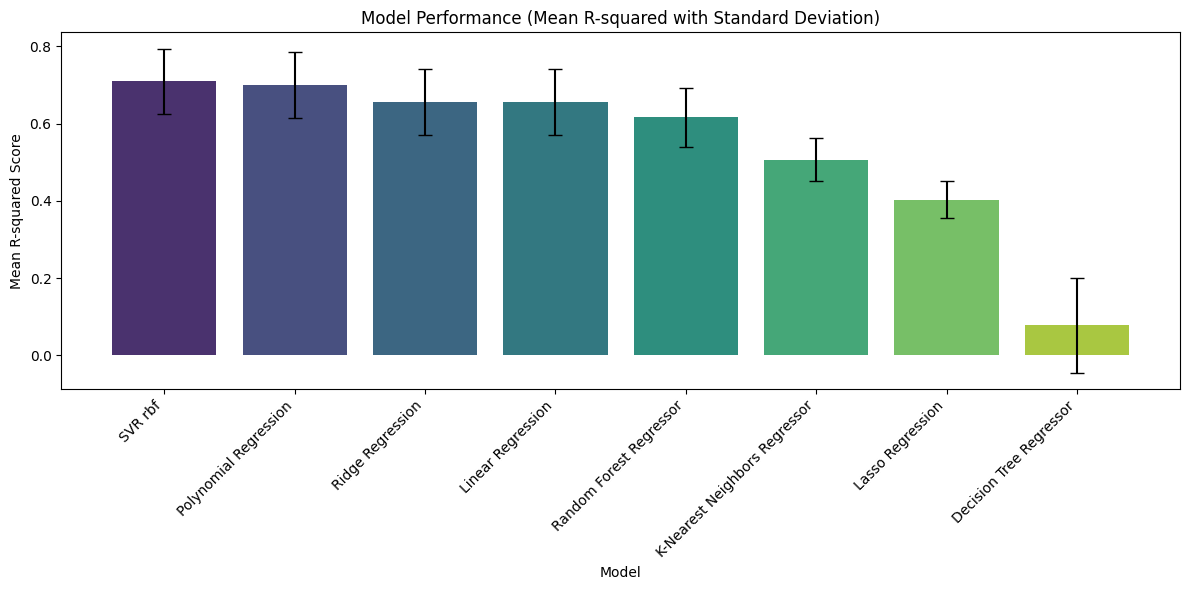

In [ ]:
plt.figure(figsize=(12, 6))


results_df_sorted = results_df.sort_values(by='Mean Score', ascending=False).reset_index(drop=True)


ax = sns.barplot(x='Model', y='Mean Score', data=results_df_sorted, hue='Model', palette='viridis', legend=False)

for i, model in enumerate(results_df_sorted['Model']):
    mean_score = results_df_sorted.loc[results_df_sorted['Model'] == model, 'Mean Score'].iloc[0]
    std_score = results_df_sorted.loc[results_df_sorted['Model'] == model, 'Std Score'].iloc[0]
    ax.errorbar(x=i, y=mean_score, yerr=std_score, color='black', capsize=5, fmt='none')

plt.title('Model Performance (Mean R-squared with Standard Deviation)')
plt.xlabel('Model')
plt.ylabel('Mean R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Abalatyon Study

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define the baseline Polynomial Regression pipeline
baseline_poly_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('rbf', SVR(kernel='rbf'))
])

# Perform 5-fold cross-validation
baseline_scores = cross_val_score(baseline_poly_pipeline, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
baseline_mean_score = baseline_scores.mean()
baseline_std_score = baseline_scores.std()

print(f"Baseline SVR rbf Mean R-squared: {baseline_mean_score:.4f}")
print(f"Baseline SVR rbf Standard Deviation: {baseline_std_score:.4f}")

Baseline SVR rbf Mean R-squared: 0.7100
Baseline SVR rbf Standard Deviation: 0.0845


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

# Create a new preprocessing ColumnTransformer without the ordinal pipeline
preprocessing_no_ordinal = ColumnTransformer([
    ('nominal', nominal_pipeline, get_nominal_columns),
    ('binary', binary_pipelines, get_binary_columns),
    ('num', numerical_pipeline, get_numerical_columns)
])

# Define the Polynomial Regression pipeline without ordinal features
poly_pipeline_no_ordinal = Pipeline([
    ('preprocessing', preprocessing_no_ordinal),
    ('rbf', SVR(kernel='rbf'))
])

# Perform 5-fold cross-validation
scores_no_ordinal = cross_val_score(poly_pipeline_no_ordinal, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
mean_score_no_ordinal = scores_no_ordinal.mean()
std_score_no_ordinal = scores_no_ordinal.std()

print(f"Polynomial Regression (No Ordinal Features) Mean R-squared: {mean_score_no_ordinal:.4f}")
print(f"Polynomial Regression (No Ordinal Features) Standard Deviation: {std_score_no_ordinal:.4f}")

Polynomial Regression (No Ordinal Features) Mean R-squared: 0.5945
Polynomial Regression (No Ordinal Features) Standard Deviation: 0.0752


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

# Create a new preprocessing ColumnTransformer without the nominal pipeline
preprocessing_no_nominal = ColumnTransformer([
    ('ordinal', ordinal_pipeline, get_ordinal_columns),
    ('binary', binary_pipelines, get_binary_columns),
    ('num', numerical_pipeline,  get_numerical_columns)
])

# Define the Polynomial Regression pipeline without nominal features
poly_pipeline_no_nominal = Pipeline([
    ('preprocessing', preprocessing_no_nominal),
    ('rbf', SVR(kernel='rbf'))
])

# Perform 5-fold cross-validation
scores_no_nominal = cross_val_score(poly_pipeline_no_nominal, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
mean_score_no_nominal = scores_no_nominal.mean()
std_score_no_nominal = scores_no_nominal.std()

print(f"Polynomial Regression (No Nominal Features) Mean R-squared: {mean_score_no_nominal:.4f}")
print(f"Polynomial Regression (No Nominal Features) Standard Deviation: {std_score_no_nominal:.4f}")

Polynomial Regression (No Nominal Features) Mean R-squared: 0.6559
Polynomial Regression (No Nominal Features) Standard Deviation: 0.0802


In [ ]:
# Create a new preprocessing ColumnTransformer without the binary pipeline
preprocessing_no_binary = ColumnTransformer([
    ('ordinal', ordinal_pipeline, get_ordinal_columns),
    ('nominal', nominal_pipeline, get_nominal_columns),
    ('num', numerical_pipeline,  get_numerical_columns)
])

# Define the Polynomial Regression pipeline without binary features
poly_pipeline_no_binary = Pipeline([
    ('preprocessing', preprocessing_no_binary),
    ('rbf', SVR(kernel='rbf'))
])

# Perform 5-fold cross-validation
scores_no_binary = cross_val_score(poly_pipeline_no_binary, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
mean_score_no_binary = scores_no_binary.mean()
std_score_no_binary = scores_no_binary.std()

print(f"Polynomial Regression (No Binary Features) Mean R-squared: {mean_score_no_binary:.4f}")
print(f"Polynomial Regression (No Binary Features) Standard Deviation: {std_score_no_binary:.4f}")

Polynomial Regression (No Binary Features) Mean R-squared: 0.6664
Polynomial Regression (No Binary Features) Standard Deviation: 0.0835


In [ ]:
# Create a new preprocessing ColumnTransformer without the numerical pipeline
preprocessing_no_numerical = ColumnTransformer([
    ('ordinal', ordinal_pipeline, get_ordinal_columns),
    ('nominal', nominal_pipeline, get_nominal_columns),
    ('binary', binary_pipelines, get_binary_columns)
])

# Define the Polynomial Regression pipeline without numerical features
poly_pipeline_no_numerical = Pipeline([
    ('preprocessing', preprocessing_no_numerical),
    ('rbf', SVR(kernel='rbf'))
])

# Perform 5-fold cross-validation
scores_no_numerical = cross_val_score(poly_pipeline_no_numerical, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
mean_score_no_numerical = scores_no_numerical.mean()
std_score_no_numerical = scores_no_numerical.std()

print(f"Polynomial Regression (No Numerical Features) Mean R-squared: {mean_score_no_numerical:.4f}")
print(f"Polynomial Regression (No Numerical Features) Standard Deviation: {std_score_no_numerical:.4f}")

Polynomial Regression (No Numerical Features) Mean R-squared: 0.0964
Polynomial Regression (No Numerical Features) Standard Deviation: 0.0193


In [ ]:
# Create a new pipeline for Tutoring_Sessions without log1p transformation
distribution_pipeline_no_log1p = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler()
)

# Create a new preprocessing ColumnTransformer without the log1p transformer for Tutoring_Sessions
preprocessing_no_log1p = ColumnTransformer([
    ('ordinal', ordinal_pipeline, get_ordinal_columns),
    ('nominal', nominal_pipeline, get_nominal_columns),
    ('binary', binary_pipelines, get_binary_columns),
    ('num', numerical_pipeline,  get_numerical_columns),
    ('tutoring_no_log1p', distribution_pipeline_no_log1p, get_distribution_columns) # Use the new pipeline
])

# Define the Polynomial Regression pipeline without log1p transformation for Tutoring_Sessions
poly_pipeline_no_log1p = Pipeline([
    ('preprocessing', preprocessing_no_log1p),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regressor', LinearRegression())
])

# Perform 5-fold cross-validation
scores_no_log1p = cross_val_score(poly_pipeline_no_log1p, X_train_transformations, y_train, cv=5, error_score='raise')

# Get mean and standard deviation of R-squared scores
mean_score_no_log1p = scores_no_log1p.mean()
std_score_no_log1p = scores_no_log1p.std()

print(f"Polynomial Regression (No log1p on Tutoring_Sessions) Mean R-squared: {mean_score_no_log1p:.4f}")
print(f"Polynomial Regression (No log1p on Tutoring_Sessions) Standard Deviation: {std_score_no_log1p:.4f}")

Polynomial Regression (No log1p on Tutoring_Sessions) Mean R-squared: 0.6986
Polynomial Regression (No log1p on Tutoring_Sessions) Standard Deviation: 0.0852


In [ ]:
results_ablation = pd.DataFrame({
    'Model Configuration': [
        'Baseline (All Features)',
        'No Ordinal Features',
        'No Nominal Features',
        'No Binary Features',
        'No Numerical Features',
        'No log1p transformartion'
    ],
    'Mean R-squared': [
        baseline_mean_score,
        mean_score_no_ordinal,
        mean_score_no_nominal,
        mean_score_no_binary,
        mean_score_no_numerical,
        mean_score_no_log1p
    ],
    'Std R-squared': [
        baseline_std_score,
        std_score_no_ordinal,
        std_score_no_nominal,
        std_score_no_binary,
        std_score_no_numerical,
        std_score_no_log1p
    ]
})

print("Ablation Study Results:")
display(results_ablation.sort_values(by='Mean R-squared', ascending=False))

Ablation Study Results:


,Model Configuration,Mean R-squared,Std R-squared
0,Baseline (All Features),0.709970,0.084456
5,No log1p transformartion,0.698603,0.085229
3,No Binary Features,0.666383,0.083468
2,No Nominal Features,0.655923,0.080233
1,No Ordinal Features,0.594529,0.075158
4,No Numerical Features,0.096430,0.019296


In [ ]:
print("Ablation Study Results:")
display(results_ablation.sort_values(by='Mean R-squared', ascending=False))

baseline_r2 = results_ablation[results_ablation['Model Configuration'] == 'Baseline (All Features)']['Mean R-squared'].iloc[0]

df_ablation_summary = results_ablation[results_ablation['Model Configuration'] != 'Baseline (All Features)'].copy()
df_ablation_summary['R-squared Drop from Baseline'] = baseline_r2 - df_ablation_summary['Mean R-squared']

display(df_ablation_summary.sort_values(by='R-squared Drop from Baseline', ascending=False))

Ablation Study Results:


,Model Configuration,Mean R-squared,Std R-squared
0,Baseline (All Features),0.709970,0.084456
5,No log1p transformartion,0.698603,0.085229
3,No Binary Features,0.666383,0.083468
2,No Nominal Features,0.655923,0.080233
1,No Ordinal Features,0.594529,0.075158
4,No Numerical Features,0.096430,0.019296


,Model Configuration,Mean R-squared,Std R-squared,R-squared Drop from Baseline
4,No Numerical Features,0.096430,0.019296,0.613540
1,No Ordinal Features,0.594529,0.075158,0.115441
2,No Nominal Features,0.655923,0.080233,0.054047
3,No Binary Features,0.666383,0.083468,0.043587
5,No log1p transformartion,0.698603,0.085229,0.011366


### Feature Engineering

In [ ]:
# Get the results from the baseline evaluation
bs_mean= results_ablation[results_ablation['Model Configuration'] == 'Baseline (All Features)']['Mean R-squared'][0]
bs_std = results_ablation[results_ablation['Model Configuration'] == 'Baseline (All Features)']['Std R-squared'][0]
bs_mean, bs_std

(np.float64(0.7099696015161678), np.float64(0.08445557416199782))

#### Feature study

In [ ]:
def abalatyion_eval(X, y, features, model):
  X = X.drop(columns=features, axis=1).copy()

  pipe = make_pipeline(preprocessing, model)

  scores = cross_val_score(pipe, X, y, cv=5, error_score='raise')
  mean_score = scores.mean()
  std_score = scores.std()
  return mean_score, std_score

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

X = X_train.copy()
y = y_train.copy()

model = SVR(kernel='rbf')

results = []
for col in X.columns:
  mean, std = abalatyion_eval(X, y, col, model)
  results.append((col, mean, std, (bs_mean), (bs_mean - mean), (bs_std - std)))

df = pd.DataFrame(results, columns=['Feature', 'Mean Score', 'Std Score', 'Base line mean', 'baseline mean diff', 'baseline std diff' ]).sort_values(by='Mean Score', ascending=False)
df

,Feature,Mean Score,Std Score,Base line mean,baseline mean diff,baseline std diff
5,Sleep_Hours,0.712844,0.085874,0.70997,-0.002874,-0.001419
18,Gender,0.710526,0.084542,0.70997,-0.000556,-0.000087
12,School_Type,0.710525,0.084489,0.70997,-0.000556,-0.000033
14,Physical_Activity,0.708364,0.082435,0.70997,0.001606,0.002021
8,Internet_Access,0.705301,0.084590,0.70997,0.004669,-0.000135
15,Learning_Disabilities,0.704179,0.083579,0.70997,0.005790,0.000877
4,Extracurricular_Activities,0.704055,0.084051,0.70997,0.005914,0.000404
17,Distance_from_Home,0.702473,0.082619,0.70997,0.007497,0.001836
11,Teacher_Quality,0.702199,0.082642,0.70997,0.007771,0.001813
7,Motivation_Level,0.698726,0.084936,0.70997,0.011243,-0.000480


In [ ]:
# Get the features had no great impact in prediction
low_influence_features = df['Feature'][:4].to_list()
low_influence_features

['Sleep_Hours', 'Gender', 'School_Type', 'Physical_Activity']

In [ ]:
BLOCKS = {
    "academic": [
        "Attendance",
        "Hours_Studied",
        "Previous_Scores",
        "Tutoring_Sessions"
    ],

    "family_context": [
        "Family_Income",
        "Parental_Education_Level",
        "Parental_Involvement",
        "School_Type"
    ],

    "personal": [
        "Sleep_Hours",
        "Physical_Activity",
        "Motivation_Level",
        "Learning_Disabilities",
        "Gender"
    ],

    "environment": [
        "Internet_Access",
        "Access_to_Resources",
        "Distance_from_Home",
        "Peer_Influence"
    ],
    "low_influence": low_influence_features
}

block_results = []
X = X_train.copy()
y = y_train.copy()
for block_name, block in BLOCKS.items():
  mean, std = abalatyion_eval(X, y, block, model)
  block_results.append((block_name, mean, std, (bs_mean), (bs_mean - mean), (bs_std - std)))
df = pd.DataFrame(block_results, columns=['block', 'Mean Score', 'Std Score', 'Base line mean', 'baseline mean diff', 'baseline std diff' ]).sort_values(by='Mean Score', ascending=False)
df

,block,Mean Score,Std Score,Base line mean,baseline mean diff,baseline std diff
4,low_influence,0.712253,0.083776,0.70997,-0.002284,0.000679
2,personal,0.696862,0.084121,0.70997,0.013108,0.000334
1,family_context,0.654423,0.075081,0.70997,0.055547,0.009375
3,environment,0.653086,0.080747,0.70997,0.056884,0.003709
0,academic,0.090593,0.020208,0.70997,0.619376,0.064248


#### New Features

In [7]:
X_fe = X_train.copy()

# New features based on academic block
X_fe['Study_Efficiency'] = X_fe['Hours_Studied'] / X_fe['Attendance']
X_fe['Support_Adjusted_Study'] = X_fe['Hours_Studied'] * X_fe['Tutoring_Sessions']
X_fe['Consistency_Score'] = X_fe['Attendance'] * X_fe['Previous_Scores']

# New features based on family / environment block
X_fe['Study_Efficiency'] = X_fe['Hours_Studied'] / X_fe['Attendance']
X_fe['Support_Adjusted_Study'] = X_fe['Hours_Studied'] * X_fe['Tutoring_Sessions']
X_fe['Consistency_Score'] = X_fe['Attendance'] * X_fe['Previous_Scores']

# New features based on low influence block
X_fe['Healthy_habits'] = X_fe['Sleep_Hours'] * X_fe['Physical_Activity']
X_fe['Motivation_Level_bins'] = X_fe['Motivation_Level'].map({
    'Low': 1,
    'Medium': 2,
    'High': 3
})
X_fe['Motivation_Adjusted_Study'] = X_fe['Hours_Studied'] * X_fe['Motivation_Level_bins']
X_fe.drop(['Motivation_Level_bins'], axis=1, inplace=True)

# New features based on data patterns

X_fe['Disability_bins'] = X_fe['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
X_fe['Disability_Compromise'] = X_fe['Attendance'] * X_fe['Disability_bins']
X_fe.drop(['Disability_bins'], axis=1, inplace=True)

X_fe.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Study_Efficiency,Support_Adjusted_Study,Consistency_Score,Healthy_habits,Motivation_Adjusted_Study,Disability_Compromise
5810,27,79,Low,High,Yes,8,63,High,Yes,2,...,No,College,Moderate,Female,0.341772,54,4977,40,81,0
1268,16,86,High,Medium,Yes,7,94,Medium,Yes,2,...,No,High School,Moderate,Female,0.186047,32,8084,21,32,0
414,22,87,Low,Medium,No,8,83,Low,Yes,1,...,No,College,Far,Male,0.252874,22,7221,8,22,0
4745,18,100,High,Medium,Yes,10,86,Medium,Yes,1,...,No,High School,Near,Male,0.180000,18,8600,30,36,0
654,35,78,High,Low,Yes,10,99,Medium,Yes,1,...,No,High School,Near,Male,0.448718,35,7722,20,70,0


In [ ]:
new_features = [
    'Study_Efficiency',
    'Support_Adjusted_Study',
    'Consistency_Score',
    'Healthy_habits',
    'Motivation_Adjusted_Study',
    'Disability_Compromise'
]


y = y_train.copy()

model = SVR(kernel='rbf')

results = []
for feature in new_features:
  mean, std = abalatyion_eval(X_fe, y, feature, model)
  results.append((feature, mean, std, (bs_mean), (bs_mean - mean), (bs_std - std)))

df = pd.DataFrame(results, columns=['Feature', 'Mean Score', 'Std Score', 'Base line mean', 'baseline mean diff', 'baseline std diff' ]).sort_values(by='Mean Score', ascending=False)
df


,Feature,Mean Score,Std Score,Base line mean,baseline mean diff,baseline std diff
3,Healthy_habits,0.702473,0.084806,0.70997,0.007496,-0.000351
0,Study_Efficiency,0.702381,0.084951,0.70997,0.007588,-0.000496
5,Disability_Compromise,0.701743,0.084998,0.70997,0.008227,-0.000542
1,Support_Adjusted_Study,0.701590,0.084892,0.70997,0.008380,-0.000436
2,Consistency_Score,0.701573,0.084781,0.70997,0.008397,-0.000325
4,Motivation_Adjusted_Study,0.700605,0.084515,0.70997,0.009365,-0.000059


In [ ]:
new_features = {
    'Study_Efficiency': lambda x: x['Hours_Studied'] / x['Attendance'],
    'Support_Adjusted_Study': lambda x: x['Hours_Studied'] * x['Tutoring_Sessions'],
    'Consistency_Score': lambda x: x['Attendance'] * x['Previous_Scores'],
    'Healthy_habits': lambda x: x['Sleep_Hours'] * x['Physical_Activity'],
    'Motivation_Adjusted_Study': lambda x: x['Hours_Studied'] * x['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3}),
    'Disability_Compromise': lambda x: x['Attendance'] * x['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
}

In [ ]:
def ablation_eval_fe(X, y, model, feature_name, feature_func):
    X_fe = X.copy()

    X_fe[feature_name] = feature_func(X_fe)

    pipe = make_pipeline(preprocessing, model)

    scores = cross_val_score(pipe, X, y, cv=5, error_score='raise')
    mean_score = scores.mean()
    std_score = scores.std()
    return mean_score, std_score


In [ ]:
X = X_train.copy()
y = y_train.copy()
results_fe = []

for feature, func in new_features.items():
  mean, std = ablation_eval_fe(X, y, model, feature, func)
  results_fe.append((feature, mean, std, (bs_mean), (bs_mean - mean), (bs_std - std)))

df = pd.DataFrame(results_fe, columns=['Feature', 'Mean Score', 'Std Score', 'Base line mean', 'baseline mean diff', 'baseline std diff' ]).sort_values(by='Mean Score', ascending=False)
display(df)

,Feature,Mean Score,Std Score,Base line mean,baseline mean diff,baseline std diff
0,Study_Efficiency,0.70997,0.084456,0.70997,0.0,0.0
1,Support_Adjusted_Study,0.70997,0.084456,0.70997,0.0,0.0
2,Consistency_Score,0.70997,0.084456,0.70997,0.0,0.0
3,Healthy_habits,0.70997,0.084456,0.70997,0.0,0.0
4,Motivation_Adjusted_Study,0.70997,0.084456,0.70997,0.0,0.0
5,Disability_Compromise,0.70997,0.084456,0.70997,0.0,0.0


#### Permutation Importance

In [14]:
from sklearn.inspection import permutation_importance

X = X_fe.copy()
y = y_train.copy()
X_tr, X_val, y_tr, y_val = train_test_split(X,
                                            y,
                                            test_size=0.2,
                                            random_state=42,
                                            shuffle=True)

pipe = make_pipeline(
    preprocessing,
    SVR(kernel="rbf")
)

pipe.fit(X, y)


perm_result = permutation_importance(
    pipe,
    X_val,          # o X_test
    y_val,
    n_repeats=15,
    random_state=42,
    scoring="r2"    # o tu métrica
)

perm_df = pd.DataFrame({
    "feature": X_val.columns,
    "importance_mean": perm_result.importances_mean,
    "importance_std": perm_result.importances_std
}).sort_values("importance_mean", ascending=False)

perm_df

KeyboardInterrupt: 

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

X = X_fe.copy()
y = y_train.copy()

pipe = make_pipeline(
    preprocessing,
    SVR(kernel="rbf")
)

scores = cross_val_score(pipe, X, y, cv=5, error_score='raise')
mean_score = scores.mean()
std_score = scores.std()

pd.DataFrame({
    'Mean Score': [mean_score],
    'Std Score': [std_score]
})

,Mean Score,Std Score
0,0.699918,0.084649


### Data Preparation Summary


The objective of this stage was to apply the insights discovered during the Exploratory Data Analysis (EDA) phase. A baseline preprocessing pipeline was constructed to handle missing values, categorical encoding, and numerical scaling, applying an appropriate transformation for each feature type.

Several models were evaluated using cross-validation, and the SVR with RBF kernel achieved the best performance, with a mean score of 0.709970 and a standard deviation of 0.084456.

#### Abalatyon Study

An ablation study was conducted by systematically removing preprocessing steps responsible for handling each feature type (ordinal, nominal, numerical, etc.).

The results showed that ordinal and numerical features are critical for model performance. Removing the ordinal feature step caused an approximate 20% drop in performance, while removing numerical features reduced the score to 0.096. This behavior is expected given the strong dependence of the SVR model on properly scaled numerical inputs.

Additionally, applying a logarithmic transformation to the 'Tutoring_Sessions' feature resulted in a modest performance improvement of approximately 1%.

#### Feature Engineering

By performing an individual feature ablation with cross-validation, several features were identified as having negligible impact on model performance and potentially introducing noise.

To further analyze feature interactions, a block-based ablation was performed using semantically meaningful groups such as academic, family_context, and environment. Removing the Low Influence block—composed of features with minimal individual impact—resulted in a slight performance improvement
(mean score = 0.712253, std = 0.083776), suggesting minor noise or redundancy effects.

#### New Features

Several engineered features were introduced; however, most of them did not improve model performance. Only Consistency_Score and Support_Adjusted_Study showed relevant contributions.

Permutation importance analysis indicated that these features have moderate importance, suggesting that the model uses them as secondary predictive signals rather than as primary drivers.

When all engineered features were included, the model exhibited worse performance compared to both:

*   the baseline model, and
*   the model with low-influence features removed.

This indicates that, in aggregate, the engineered features introduce additional noise rather than meaningful predictive power.

#### Conclusion

Based on the extensive feature evaluation, ablation studies, and feature engineering experiments, it can be concluded that the dataset does not benefit from an extensive creation of new features. The original feature set already captures most of the predictive signal required by the model.

Removing low-influence features resulted in a slight but consistent improvement in model performance, indicating that some variables introduced noise or redundancy rather than meaningful information.

Among the engineered features, only Consistency_Score and Support_Adjusted_Study demonstrated measurable utility. These features were not primary drivers of prediction but served as secondary corrective signals, complementing the core academic-related variables.

The SVR model with RBF kernel proved to be well-suited for this problem, effectively modeling non-linear relationships without requiring aggressive feature expansion. More complex feature combinations did not improve performance and, in some cases, reduced generalization.

Overall, the final model favors simplicity, robustness, and interpretability, achieving stable performance through careful feature selection rather than extensive feature engineering.



# Promising Models

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class FeatureExtractor(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.new_features_funcs = {
    'Consistency_Score': lambda x: x['Attendance'] * x['Previous_Scores'],
    'Motivation_Adjusted_Study': lambda x: x['Hours_Studied'] * x['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3}),
    }
    self.columns_to_drop = [
        'Gender',
        'School_Type',
        'Sleep_Hours',
        'Physical_Activity',
    ]
    self._features_out = None

  def fit(self, X, y=None):
    initial_columns = X.columns.tolist()

    remaining_columns_after_drop = [col for col in initial_columns if col not in self.columns_to_drop]

    self._features_out = remaining_columns_after_drop + list(self.new_features_funcs.keys())
    return self

  def transform(self, X):
    X_transformed = X.copy()

    X_transformed = X_transformed.drop(columns=self.columns_to_drop, errors='ignore')

    for feature_name, func in self.new_features_funcs.items():
      X_transformed[feature_name] = func(X)

    return X_transformed

  def get_feature_names_out(self, input_features=None):
    if self._features_out is not None:
        return np.array(self._features_out)
    elif input_features is not None:
        remaining_columns = [col for col in input_features if col not in self.columns_to_drop]
        return np.array(remaining_columns + list(self.new_features_funcs.keys()))
    else:
        raise ValueError("Either fit must be called or input_features must be provided to get_feature_names_out.")

### Shortlist promising models

In [29]:
def evaluate_model(X, y, pipe):
    scores = cross_val_score(pipe, X, y, cv=5, error_score='raise')
    mean_score = scores.mean()
    std_score = scores.std()
    return mean_score, std_score

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('SVR RBF', SVR(kernel='rbf')),
    ('SVR Poly', SVR(kernel='poly', degree=2))
]

results = []
X = X_train.copy()
y = y_train.copy()
for model_name, model in models:
    pipe = Pipeline([
        ('Feature_Engineering', FeatureExtractor()),
        ('preprocessing', preprocessing),
        ('model', model)
    ])
    score, std = evaluate_model(pipe=pipe, X=X, y=y)
    results.append((model_name, score, std))

results_df = pd.DataFrame(results, columns=['Model', 'Mean R-squared', 'Std R-squared'])
display(results_df.sort_values(by='Mean R-squared', ascending=False))

,Model,Mean R-squared,Std R-squared
8,SVR RBF,0.710240,0.085259
1,Polynomial Regression,0.697925,0.084435
9,SVR Poly,0.694665,0.084852
7,Gradient Boosting Regressor,0.679740,0.084352
2,Ridge Regression,0.659011,0.085854
0,Linear Regression,0.659003,0.085847
6,Random Forest Regressor,0.612573,0.073485
5,K-Nearest Neighbors Regressor,0.528448,0.055796
3,Lasso Regression,0.417987,0.049827
4,Decision Tree Regressor,0.068504,0.157026


Based on the previous results, it can be concluded the SVR with kernel rbf still being the best model.

### Fine-tuning


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# 1. Create a scikit-learn Pipeline named svr_pipeline
svr_pipeline = Pipeline([
    ('feature_extraction', FeatureExtractor()),
    ('preprocessing', preprocessing),
    ('model', SVR(kernel='rbf'))
])

# 2. Evaluate the svr_pipeline using 5-fold cross-validation
# X_train and y_train are already defined and available from previous steps
svr_scores = cross_val_score(svr_pipeline, X_train, y_train, cv=5, error_score='raise')

# 3. Print the mean R-squared score and its standard deviation
mean_svr_score = svr_scores.mean()
std_svr_score = svr_scores.std()

print(f"SVR RBF Pipeline Mean R-squared: {mean_svr_score:.4f}")
print(f"SVR RBF Pipeline Standard Deviation: {std_svr_score:.4f}")

SVR RBF Pipeline Mean R-squared: 0.7102
SVR RBF Pipeline Standard Deviation: 0.0853


In [47]:
from scipy.stats import uniform, loguniform

param_distributions_svr = {
    'model__C': loguniform(1e0, 1e3),  # C from 1 to 1000 (log-uniform)
    'model__gamma': loguniform(1e-4, 1e-1), # gamma from 0.0001 to 0.1 (log-uniform)
    'model__epsilon': uniform(0.1, 0.5) # epsilon from 0.1 to 0.6 (uniform distribution for a range of 0.5 starting at 0.1)
}

print("Hyperparameter distributions for SVR (RBF kernel) defined.")

Hyperparameter distributions for SVR (RBF kernel) defined.


In [48]:
from sklearn.model_selection import RandomizedSearchCV

random_search_svr = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions_svr,
    n_iter=15,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting RandomizedSearchCV for SVR...")
random_search_svr.fit(X_train, y_train)
print("RandomizedSearchCV for SVR completed.")

print(f"Best parameters found: {random_search_svr.best_params_}")
print(f"Best R-squared score: {random_search_svr.best_score_:.4f}")

Starting RandomizedSearchCV for SVR...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
RandomizedSearchCV for SVR completed.
Best parameters found: {'model__C': np.float64(133.1121608073688), 'model__epsilon': np.float64(0.11029224714790123), 'model__gamma': np.float64(0.0812324508558869)}
Best R-squared score: 0.7137


## Final Evaluation

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

final_model = random_search_svr.best_estimator_

y_pred = final_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R²: {r2:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Test R²: 0.7687
Test MSE: 3.2690
Test RMSE: 1.8080


## Final Conclusion

After performing a final evaluation across several models, the SVR with an RBF kernel remained the best-performing approach, achieving a mean cross-validation R² of 0.7102 using the final pipeline, which includes both feature engineering and feature selection.

During the fine-tuning stage, the model’s performance improved slightly, increasing the cross-validation R² from 0.7102 to 0.7137, indicating a modest but consistent gain from hyperparameter optimization.

The final model was then evaluated on a held-out test set to assess its generalization capability. The SVR (RBF) achieved a test R² of 0.7687, showing that the model explains approximately 77% of the variance in unseen data.

Additionally, the model obtained a Root Mean Squared Error (RMSE) of 1.81, meaning that predictions deviate on average by less than two units from the true target values. These results confirm that the model generalizes well and maintains stable performance beyond cross-validation estimates.
